### Dataset : Fraudulent E-Commerce Transactions

The dataset was collected from kaggle. Here the work is done on version 2 of the dataset . Which contains 23,634 records of payment transactions made by different customers on an e-commarce platform.

Initially the dataset contained 16 unique features which are commonly used for fraud detection . Where 15 of the features can be used for predicting whether a transaction is fraudulent or not . Which inside one of the 16 columns of the dataset .


**Features:**

1.Transaction ID: A unique identifier for each transaction.

2.Customer ID: A unique identifier for each customer.

3.Transaction Amount: The total amount of money exchanged in the transaction.

4.Transaction Date: The date and time when the transaction took place.

5.Payment Method: The method used to complete the transaction (e.g., credit card, PayPal, etc.).

6.Product Category: The category of the product involved in the transaction.

7.Quantity: The number of products involved in the transaction.

8.Customer Age: The age of the customer making the transaction.

9.Customer Location: The geographical location of the customer.

10.Device Used: The type of device used to make the transaction (e.g., mobile, desktop).

11.IP Address: The IP address of the device used for the transaction.

12.Shipping Address: The address where the product was shipped.

13.Billing Address: The address associated with the payment method.

14.Is Fraudulent: A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).

15.Account Age Days: The age of the customer's account in days at the time of the transaction.

16.Transaction Hour: The hour of the day when the transaction occurred.




The columns : 'Transaction Date','Transaction ID', 'Customer ID', 'IP Address', 'Shipping Address', 'Billing Address' were dropped as they do not contribute significantly while preparing our model .



Label Encoder was applied to the columns : 'Payment Method','Product Category','Customer Location','Device Used' as they were containing categorical values .

Among the models I worked on , Random forest performed best and provided an accuracy of 87% .

### Started the workflow with importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Personal notebooks/Datasets/Fraudulent_E-Commerce_Transaction_Data_2.csv")
df=pd.DataFrame(data)
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Transaction Amount,0
Transaction Date,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Customer Location,0
Device Used,0


In [ ]:
df.dtypes

,0
Transaction ID,object
Customer ID,object
Transaction Amount,float64
Transaction Date,object
Payment Method,object
Product Category,object
Quantity,int64
Customer Age,int64
Customer Location,object
Device Used,object


array([[<Axes: title={'center': 'Transaction Amount'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Customer Age'}>,
        <Axes: title={'center': 'Is Fraudulent'}>],
       [<Axes: title={'center': 'Account Age Days'}>,
        <Axes: title={'center': 'Transaction Hour'}>]], dtype=object)

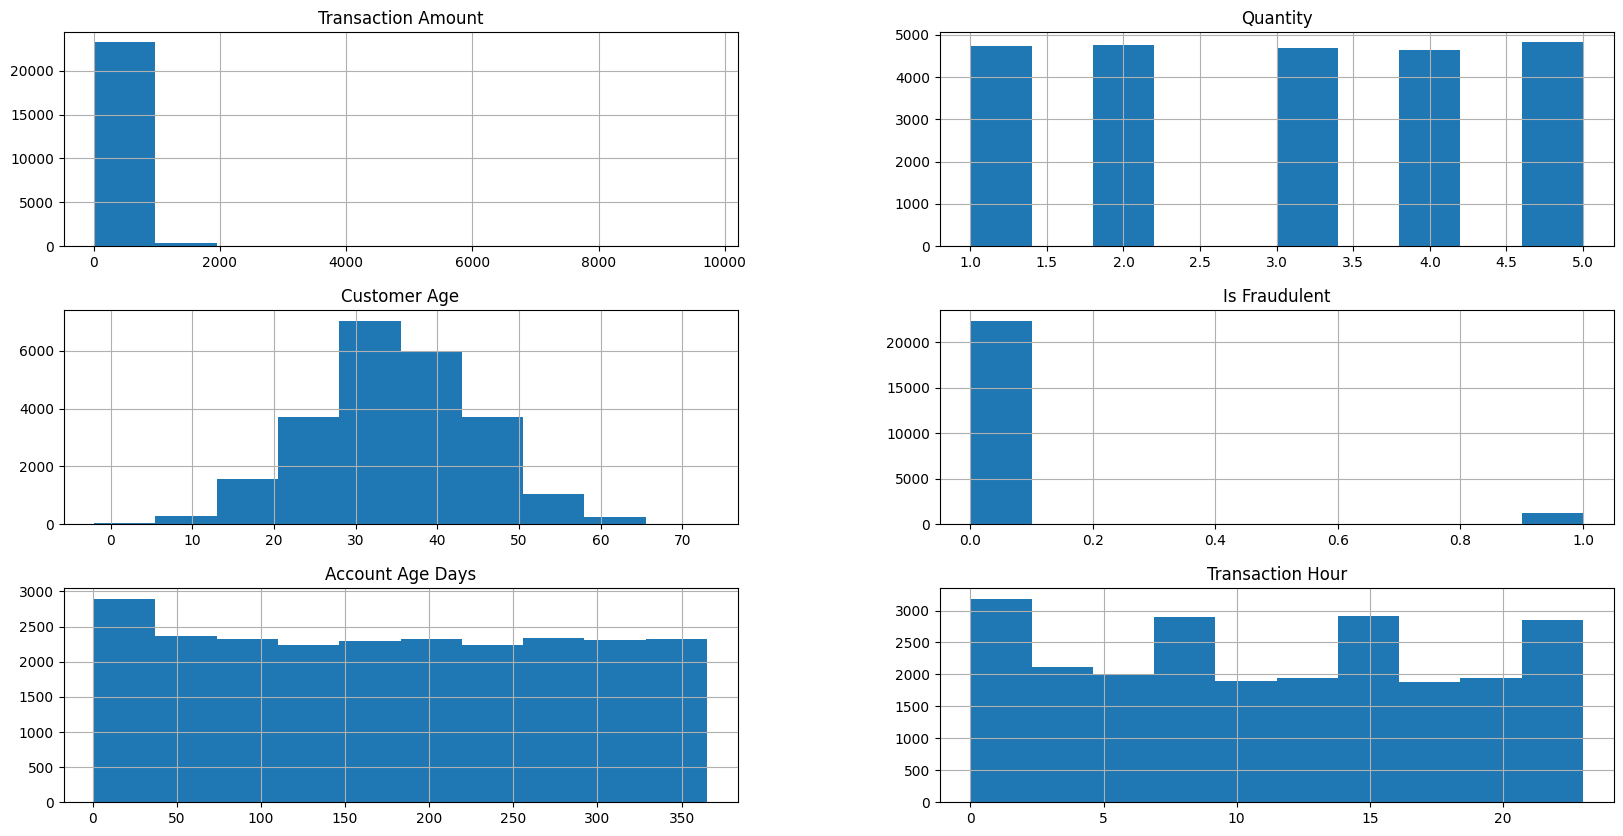

In [ ]:
df.hist(figsize=(20,10))

From the histplot above we see , the dataset is highly imbalance with respect to the value distribution of the column 'Is Fraudulent'

In [ ]:
df['Is Fraudulent'].value_counts()

,count
Is Fraudulent,
0,22412
1,1222


In [ ]:
df=df.drop(columns=['Transaction Date','Transaction ID', 'Customer ID', 'IP Address',
                'Shipping Address', 'Billing Address'])
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,PayPal,electronics,1,40,East Jameshaven,desktop,0,282,23
1,301.34,credit card,electronics,3,35,Kingstad,tablet,0,223,0
2,340.32,debit card,toys & games,5,29,North Ryan,desktop,0,360,8
3,95.77,credit card,electronics,5,45,Kaylaville,mobile,0,325,20
4,77.45,credit card,clothing,5,42,North Edwardborough,desktop,0,116,15


<Axes: xlabel='Is Fraudulent', ylabel='count'>

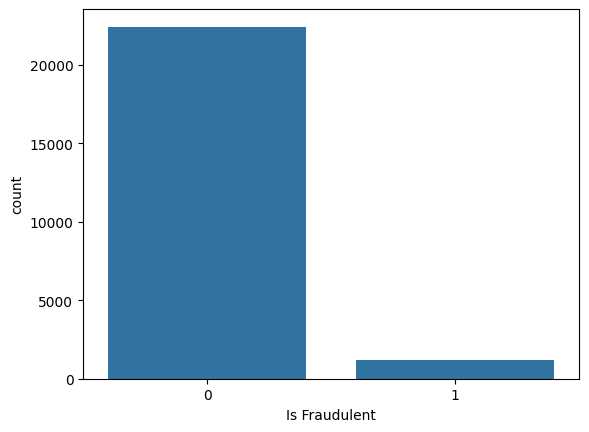

In [ ]:
sns.countplot(data=df, x='Is Fraudulent')

<Axes: xlabel='Customer Age', ylabel='Count'>

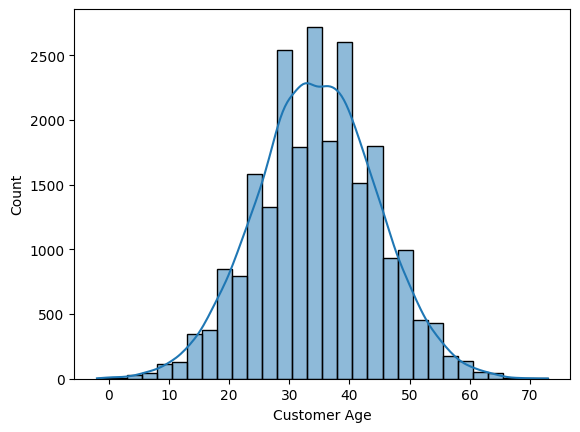

In [ ]:
sns.histplot(df['Customer Age'], bins=30, kde=True)

<Axes: xlabel='Device Used', ylabel='count'>

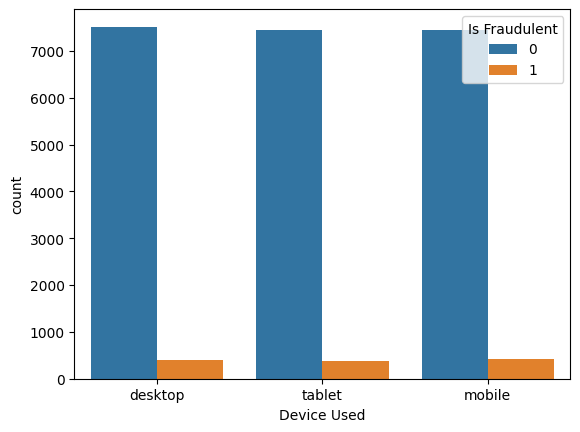

In [ ]:
sns.countplot(x='Device Used', hue='Is Fraudulent', data=df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


columns_to_encode=['Payment Method','Product Category','Customer Location','Device Used']
df_encoded = df.copy()
for col in columns_to_encode:
    df_encoded[col] = le.fit_transform(df_encoded[col])

<Axes: >

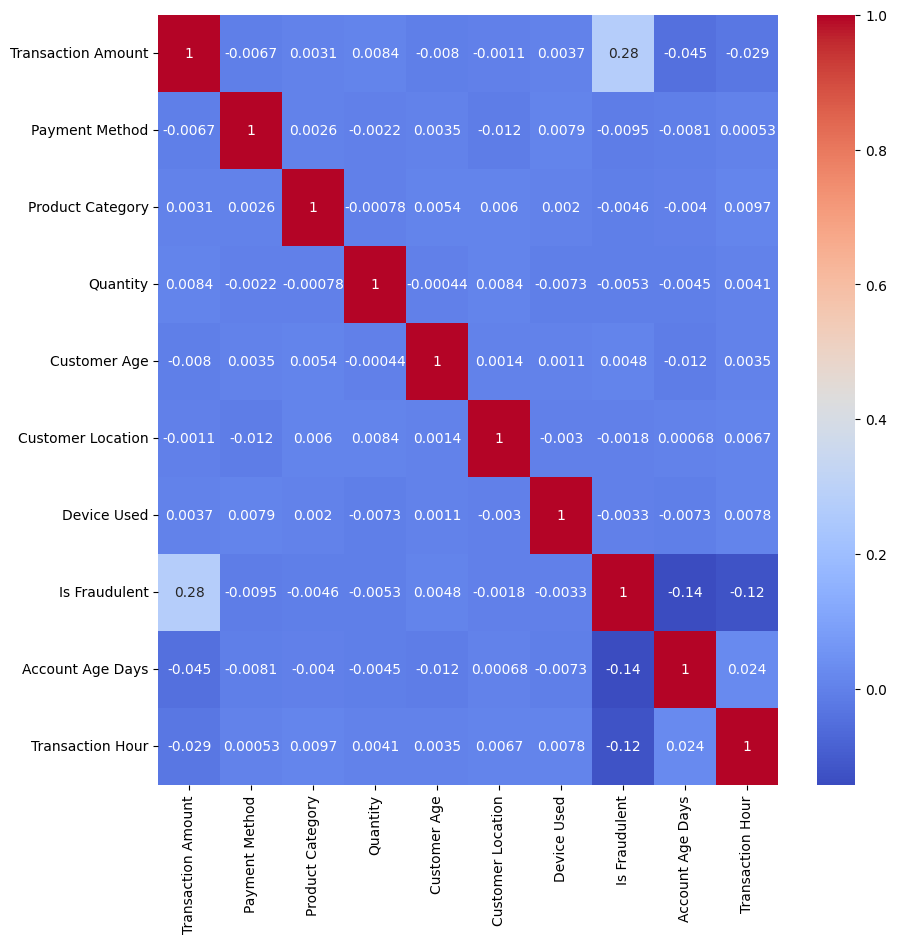

In [ ]:
corr = df_encoded.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [ ]:
x=df_encoded.drop(columns=['Is Fraudulent'])
y=df_encoded['Is Fraudulent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
print("Before SMOTE:", Counter(y_train))

Before SMOTE: Counter({0: 17929, 1: 978})


In [ ]:
smote=SMOTE(random_state=42,sampling_strategy=1.0)

x_train_balanced,y_train_balanced=smote.fit_resample(X_train,y_train)


print("After SMOTE :",Counter(y_train_balanced))

After SMOTE : Counter({0: 17929, 1: 17929})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score

### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train_balanced, y_train_balanced)

DecisionTreeClassifier()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, accuracy_score

y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8267400042310133


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3958
           1       0.40      0.13      0.19       769

    accuracy                           0.83      4727
   macro avg       0.62      0.54      0.55      4727
weighted avg       0.78      0.83      0.79      4727



In [ ]:
from sklearn.metrics import confusion_matrix

<Axes: >

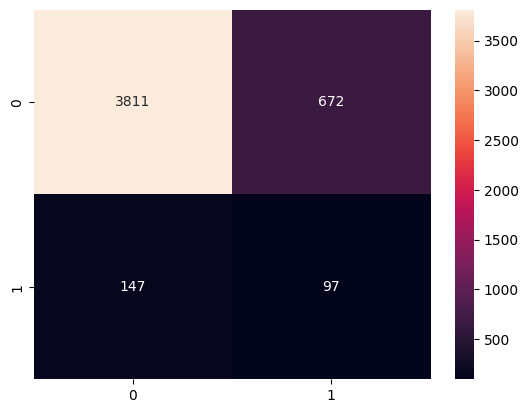

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

### Logistic Regression

In [ ]:
lr=LogisticRegression(max_iter=2000)
lr.fit(x_train_balanced,y_train_balanced)
y_pred=lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 0.7554474296594035


In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Randomforest

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train_balanced,y_train_balanced)
y_pred=rf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8711656441717791


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4176
           1       0.38      0.17      0.23       551

    accuracy                           0.87      4727
   macro avg       0.64      0.57      0.58      4727
weighted avg       0.84      0.87      0.85      4727



<Axes: >

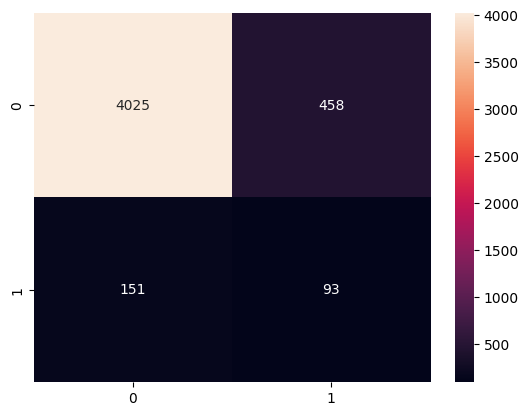

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train_balanced,y_train_balanced)
y_pred=knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7541781256610959


### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC()
svm.fit(x_train_balanced,y_train_balanced)
y_pred=svm.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6682885551089486
